# PRACA DOMOWA 7


### Ada Gąssowska


In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as pltim
from sklearn.decomposition import PCA

### Wczytanie i wyświetlenie obrazka 

In [61]:
lemur_img = pltim.imread('C:/Users/Ada/Desktop/lemur.jpg')

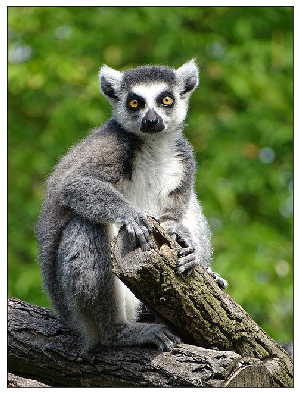

In [62]:
fig, axes = plt.subplots(figsize=(7, 7))
axes.imshow(lemur_img)
plt.tick_params(
        axis='both',          
        which='both',
        top=False,
        bottom=False,
        labelbottom=False,
        labelleft=False,
        right=False,
        left=False
        ) 
plt.show()

### Wymiary i rozmiar obrazka

In [63]:
lemur_img.shape

(640, 480, 3)

In [64]:
lemur_img.size

921600

Mamy macierz trójwymiarową - 926x1000 pixeli i dla każdego 3 wartości RGB. Teraz zmienimy macierz na dwuwymiarową. 

In [66]:
lemur_img_2d = np.reshape(lemur_img, (640, 480*3))

## PCA - redukcja wymiarów

Na podstawie wykresu skumulowanej wariancji w zależności od ilości wymiarów, spróbujemy znaleźć ilość komponentów która powinna nam wystarczyć do dosyć dobrego odtworzenia obrazka (dajmy na to 0.95)

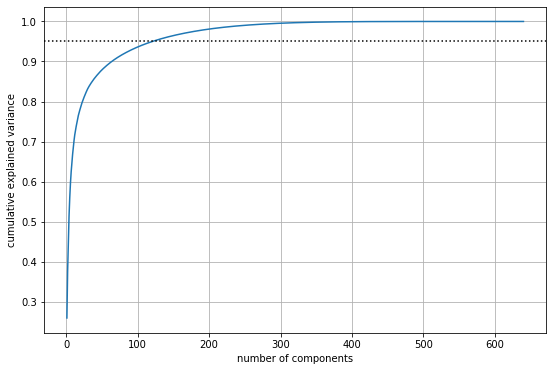

In [77]:
pca = PCA().fit(lemur_img_2d)
plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.axhline(0.95, color = "black", ls = ":")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Na oko wydaje się, że za skumulowaną wariancję na poziomie 95% odpowiada ok. 110 komponentów. Sprawdźmy to jednak dokładniej. 

In [68]:
pca = PCA(0.95) 
img_comp = pca.fit_transform(lemur_img_2d)
print(img_comp.shape)

(640, 121)


Okazuje się, że aby uzyskać wariancję na poziomie 95% potrzebujemy 121 komponentów

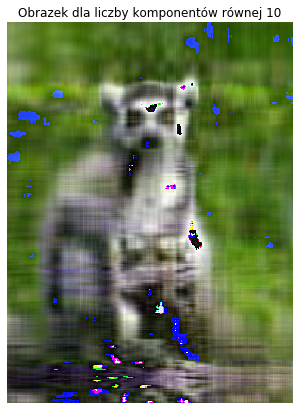

Stosunek rozmiaru tego obrazka do obrazka oryginalnego wynosi:0.006944444444444444


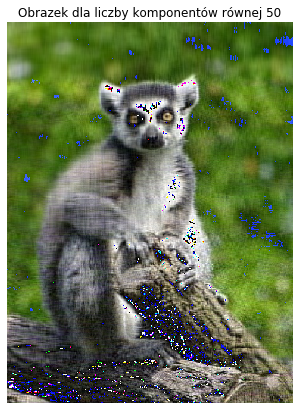

Stosunek rozmiaru tego obrazka do obrazka oryginalnego wynosi:0.034722222222222224


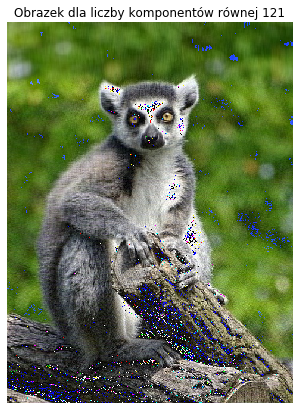

Stosunek rozmiaru tego obrazka do obrazka oryginalnego wynosi:0.08402777777777778


In [75]:
for i in [10, 50, 121]:
    pca = PCA(i).fit(lemur_img_2d)
    img_pca = pca.transform(lemur_img_2d)
    temp = pca.inverse_transform(img_pca) 
    temp = np.reshape(temp, (640, 480, 3))
    fig = plt.figure(figsize = (7, 7))
    ax = fig.add_subplot(111)
    ax.imshow(temp.astype(np.uint8))
    plt.axis("off")
    plt.title("Obrazek dla liczby komponentów równej " + str(i))
    plt.show()
    print("Stosunek rozmiaru tego obrazka do obrazka oryginalnego wynosi:" + str(img_pca.size/lemur_img.size))

Obrazek stracił na jakości, jednak nawet dla 50 komponentów wyraźnie widać na obrazku lemura. Dla liczby komponentów równej 121 obrazek jest dosyć wyraźny, a jego rozmiar wynosi jedynie ok 8% rozmiaru oryginalnego obrazka. Gdybyśmy potrzebowali jednak lepszej jakości obrazka, można spróbować jeszcze na dużo większej liczbe komponentów - 500. 

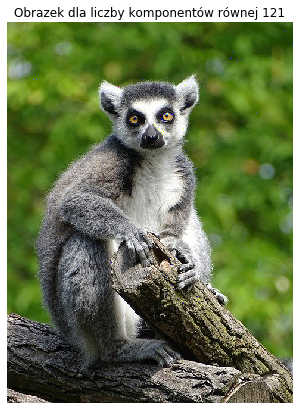

Stosunek rozmiaru tego obrazka do obrazka oryginalnego wynosi:0.3472222222222222


In [83]:
pca = PCA(500).fit(lemur_img_2d)
img_pca = pca.transform(lemur_img_2d)
temp = pca.inverse_transform(img_pca) 
temp = np.reshape(temp, (640, 480, 3))
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)
ax.imshow(temp.astype(np.uint8))
plt.axis("off")
plt.title("Obrazek dla liczby komponentów równej " + str(i))
plt.show()
print("Stosunek rozmiaru tego obrazka do obrazka oryginalnego wynosi:" + str(img_pca.size/lemur_img.size))

Obrazek ma ok. 3 razy mniejszy rozmiar niż oryginalny, a jakość ma na tyle dobrą, że praktycznie nie widać różnicy! PCA okazało się być bardzo dobrym narzędziem do redukcji rozmiaru obrazów. 